In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt
from datetime import datetime, date
#plt.style.use(['science', 'notebook'])
%matplotlib inline

### Ce fichier est mis à jour par weather_bis.py sur pi4 dans terminal


In [426]:

csv_file1 = r"Y:\Documents\temp16122022.csv.old"
csv_file1 = r"Y:\Documents\temp03062024.csv"
csv_file2 = r"Z:\Documents\temp16122022.csv"


In [427]:

def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)


def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data

try:
    data = get_data(csv_file1)
except:
    data = get_data(csv_file2)
#data['heure'] = pd.to_datetime(data['time']).dt.strftime('%H:%M') #time
#data['jour'] = pd.to_datetime(data['time']).dt.strftime('%d/%m') #date
len(data)
data

,temp
0,13.19
1,12.20
2,12.29
3,12.42
4,14.54
...,...
5291,3.91
5292,3.00
5293,2.78
5294,2.62


In [428]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df

def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)


<Axes: >

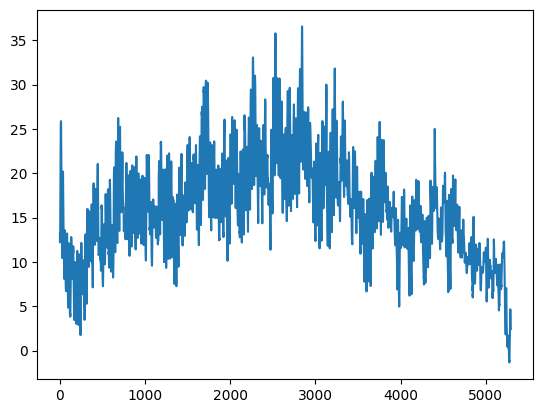

In [429]:
data['temp'].plot()

In [430]:
# convert string to datetime
date_time_str = '16/04/24 07:00:00'
ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
ref

datetime.datetime(2024, 4, 16, 7, 0)

In [431]:
then = ref + dt.timedelta(hours=len(data))
ref,then

(datetime.datetime(2024, 4, 16, 7, 0), datetime.datetime(2024, 11, 22, 23, 0))

In [432]:
len(data)

5296

In [433]:
date_time_str

'16/04/24 07:00:00'

In [434]:
def mk_date(date_time_str,data):
    # 
    ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    then = ref + dt.timedelta(hours=len(data))
    return mdates.drange(ref,then,dt.timedelta(hours=1))


In [435]:
hours = mk_date(date_time_str,data)
hours
#len(hours)

array([19829.29166667, 19829.33333333, 19829.375     , ...,
       20049.83333333, 20049.875     , 20049.91666667])

In [436]:
dates = [datetime.strftime(h, '%d/%m/%y %H:%M:%S') for h in mdates.num2date(hours)]
#dates

In [437]:
if len(data)<len(hours):
    data['hours']=hours[:-1]
    data['dates']=dates[:-1]
else:
    data['hours']=hours
    data['dates']=dates

In [438]:
data[['dates','temp']]

,dates,temp
0,16/04/24 07:00:00,13.19
1,16/04/24 08:00:00,12.20
2,16/04/24 09:00:00,12.29
3,16/04/24 10:00:00,12.42
4,16/04/24 11:00:00,14.54
...,...,...
5291,22/11/24 18:00:00,3.91
5292,22/11/24 19:00:00,3.00
5293,22/11/24 20:00:00,2.78
5294,22/11/24 21:00:00,2.62


In [439]:
import warnings
warnings.filterwarnings("ignore")


In [440]:
temp= np.array(data['temp'])
len(temp)
#type(temp)
data,len(data)

(       temp         hours              dates
 0     13.19  19829.291667  16/04/24 07:00:00
 1     12.20  19829.333333  16/04/24 08:00:00
 2     12.29  19829.375000  16/04/24 09:00:00
 3     12.42  19829.416667  16/04/24 10:00:00
 4     14.54  19829.458333  16/04/24 11:00:00
 ...     ...           ...                ...
 5291   3.91  20049.750000  22/11/24 18:00:00
 5292   3.00  20049.791667  22/11/24 19:00:00
 5293   2.78  20049.833333  22/11/24 20:00:00
 5294   2.62  20049.875000  22/11/24 21:00:00
 5295   2.42  20049.916667  22/11/24 22:00:00
 
 [5296 rows x 3 columns],
 5296)

In [441]:
# data des 24 premieres heures
d_24 = data[:24]['temp']
#d_24


In [442]:
# moyenne des premieres 24 heures
m_day = d_24.mean()
m_day

19.400000000000016

In [443]:
# moyenne sur 24 heures depuis le 16/12/2022 9h
mean_all = []
window = 24
h_w = window//2
for l in range(len(data)-window):
    d_24 = data[l:l+window]['temp'].mean()
    mean_all.append(d_24)
x = data[:-window]['hours'].values    
len(mean_all)

5272

In [444]:
len(x)

5272

In [445]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))  #('%d/%m\n%H:%M'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

Text(0.5, 1.0, 'Moyenne sur 24 heures sur 7 jours')

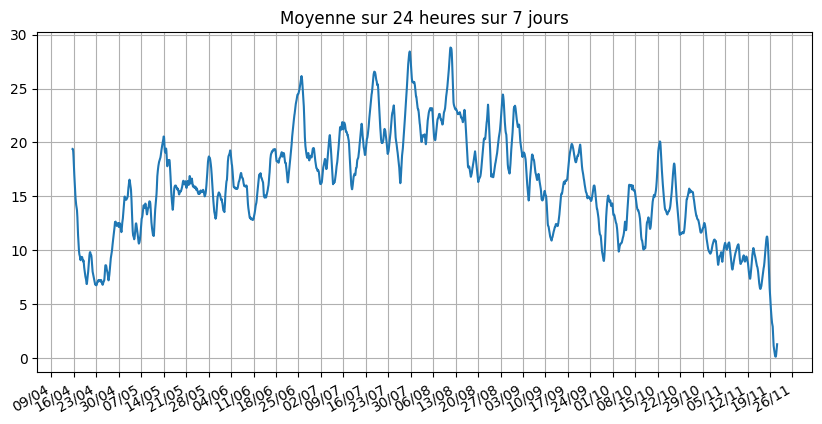

In [446]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(x,mean_all, markersize=1)
jours = 7
format_date(jours*24) #10 jours x 24 h
plt.title(f'Moyenne sur 24 heures sur {jours} jours') #depuis le 16/12/2022')
#plt.grid()

In [447]:
today = datetime.now()
diff = today - ref
diff

datetime.timedelta(days=220, seconds=53272, microseconds=284528)

In [448]:
days = diff.days + diff.seconds/(24*3600)
days = int(days)


In [449]:
# moyenne depuis le 16/12/22
slice = int(days*24)
h = data.tail(slice).hours
t = data.tail(slice).temp
#h, t
ref,today,days


(datetime.datetime(2024, 4, 16, 7, 0),
 datetime.datetime(2024, 11, 22, 21, 47, 52, 284528),
 220)

In [450]:
moyenne = data['temp'].mean()
moyenne

15.983340256797606

15.983340256797606

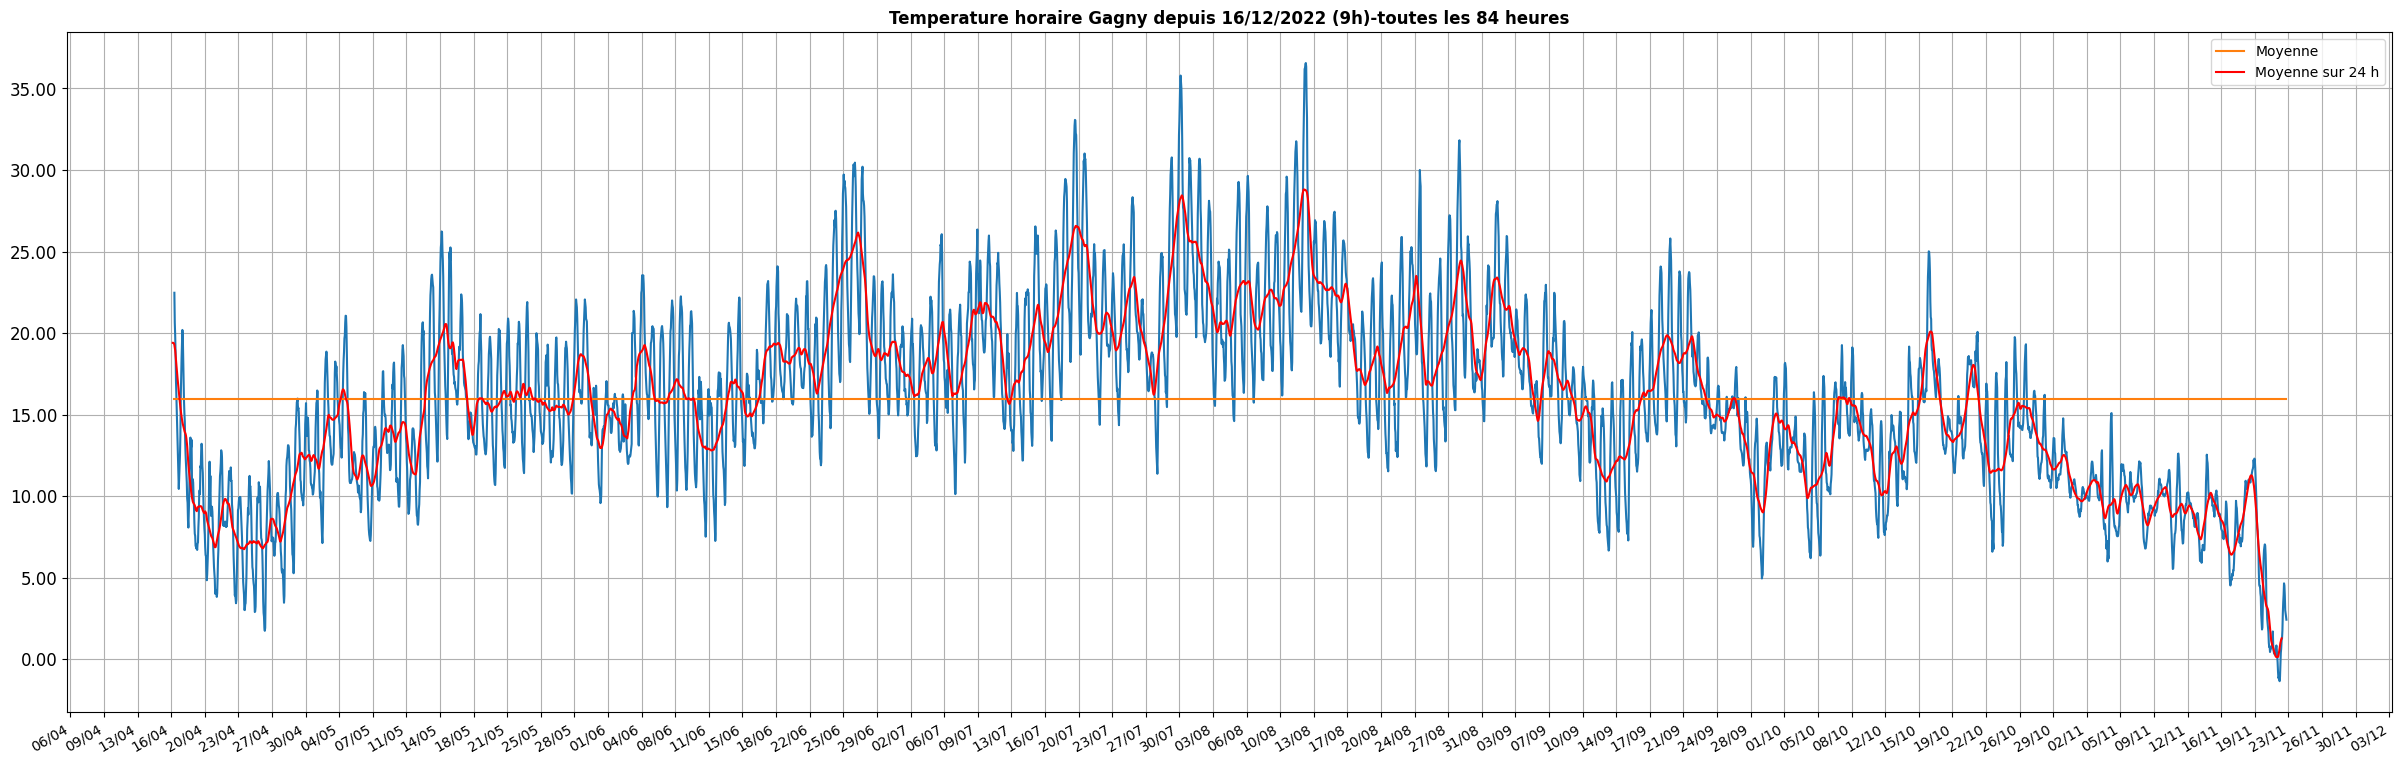

In [451]:
interval = 84
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
#plot = data['temp'].plot(figsize=(12,6))
plt.plot(h,t)
h1 = h.head(1)
h2 = h.tail(1)
plt.plot((h1,h2),(moyenne, moyenne),label='Moyenne')
plt.plot(hours[h_w:len(data)-h_w],mean_all,'r-',label=f'Moyenne sur {window} h')
#plt.plot(hours,temp)
plt.title(f"Temperature horaire Gagny depuis 16/12/2022 (9h)-toutes les {interval} heures",fontweight ='bold')


plt.legend()
#ax.set_xticks(hours)
ax.set_xticklabels(hours,fontsize=10)
#ax.set_yticks()
ax.set_yticklabels(temp,fontsize=12)

# Y_axis
formatter = ticker.FormatStrFormatter('%1.2f')
Axis.set_major_formatter(ax.yaxis, formatter)
format_date(84)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m:%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=interval))
# plt.gcf().autofmt_xdate()
# plt.grid()
moyenne


In [452]:
data['variation']=data['temp'].diff()
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
5291,3.91,20049.750000,22/11/24 18:00:00,-0.60
5292,3.00,20049.791667,22/11/24 19:00:00,-0.91
5293,2.78,20049.833333,22/11/24 20:00:00,-0.22
5294,2.62,20049.875000,22/11/24 21:00:00,-0.16


<Axes: >

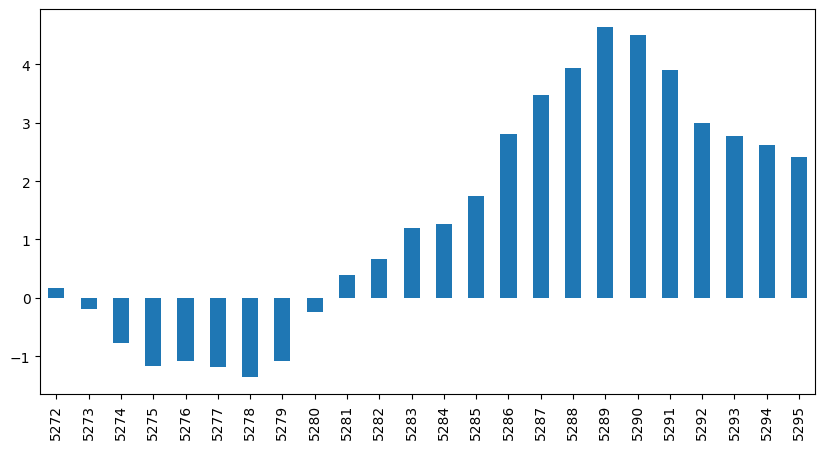

In [453]:
data.tail(24)['temp'].plot.bar(figsize=(10,5))

In [454]:
data

,temp,hours,dates,variation
0,13.19,19829.291667,16/04/24 07:00:00,NaN
1,12.20,19829.333333,16/04/24 08:00:00,-0.99
2,12.29,19829.375000,16/04/24 09:00:00,0.09
3,12.42,19829.416667,16/04/24 10:00:00,0.13
4,14.54,19829.458333,16/04/24 11:00:00,2.12
...,...,...,...,...
5291,3.91,20049.750000,22/11/24 18:00:00,-0.60
5292,3.00,20049.791667,22/11/24 19:00:00,-0.91
5293,2.78,20049.833333,22/11/24 20:00:00,-0.22
5294,2.62,20049.875000,22/11/24 21:00:00,-0.16


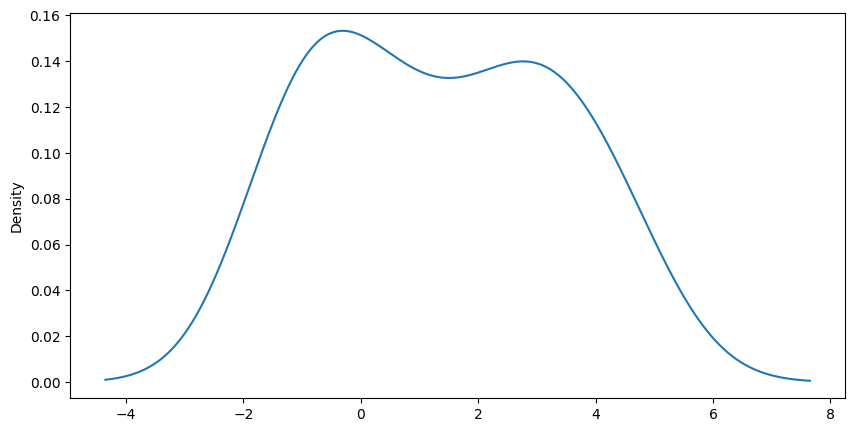

In [455]:
span = 24
try:
    data.tail(span)['temp'].plot.kde(figsize=(10,5))
    #data['temp'].plot.kde(figsize=(10,5))
except:
    pass

<Axes: ylabel='Frequency'>

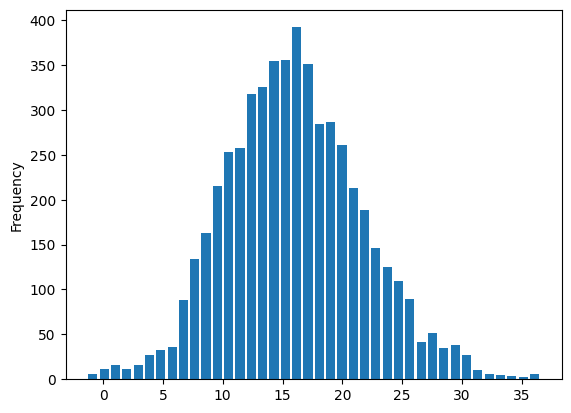

In [456]:
data['temp'].plot.hist(bins=40,rwidth=0.8) #,histtype='step')


<Axes: ylabel='Density'>

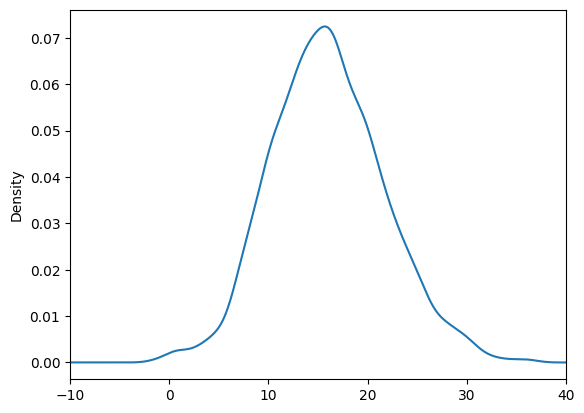

In [457]:
data['temp'].plot.kde(xlim=(-10,40)) #,logy=True)

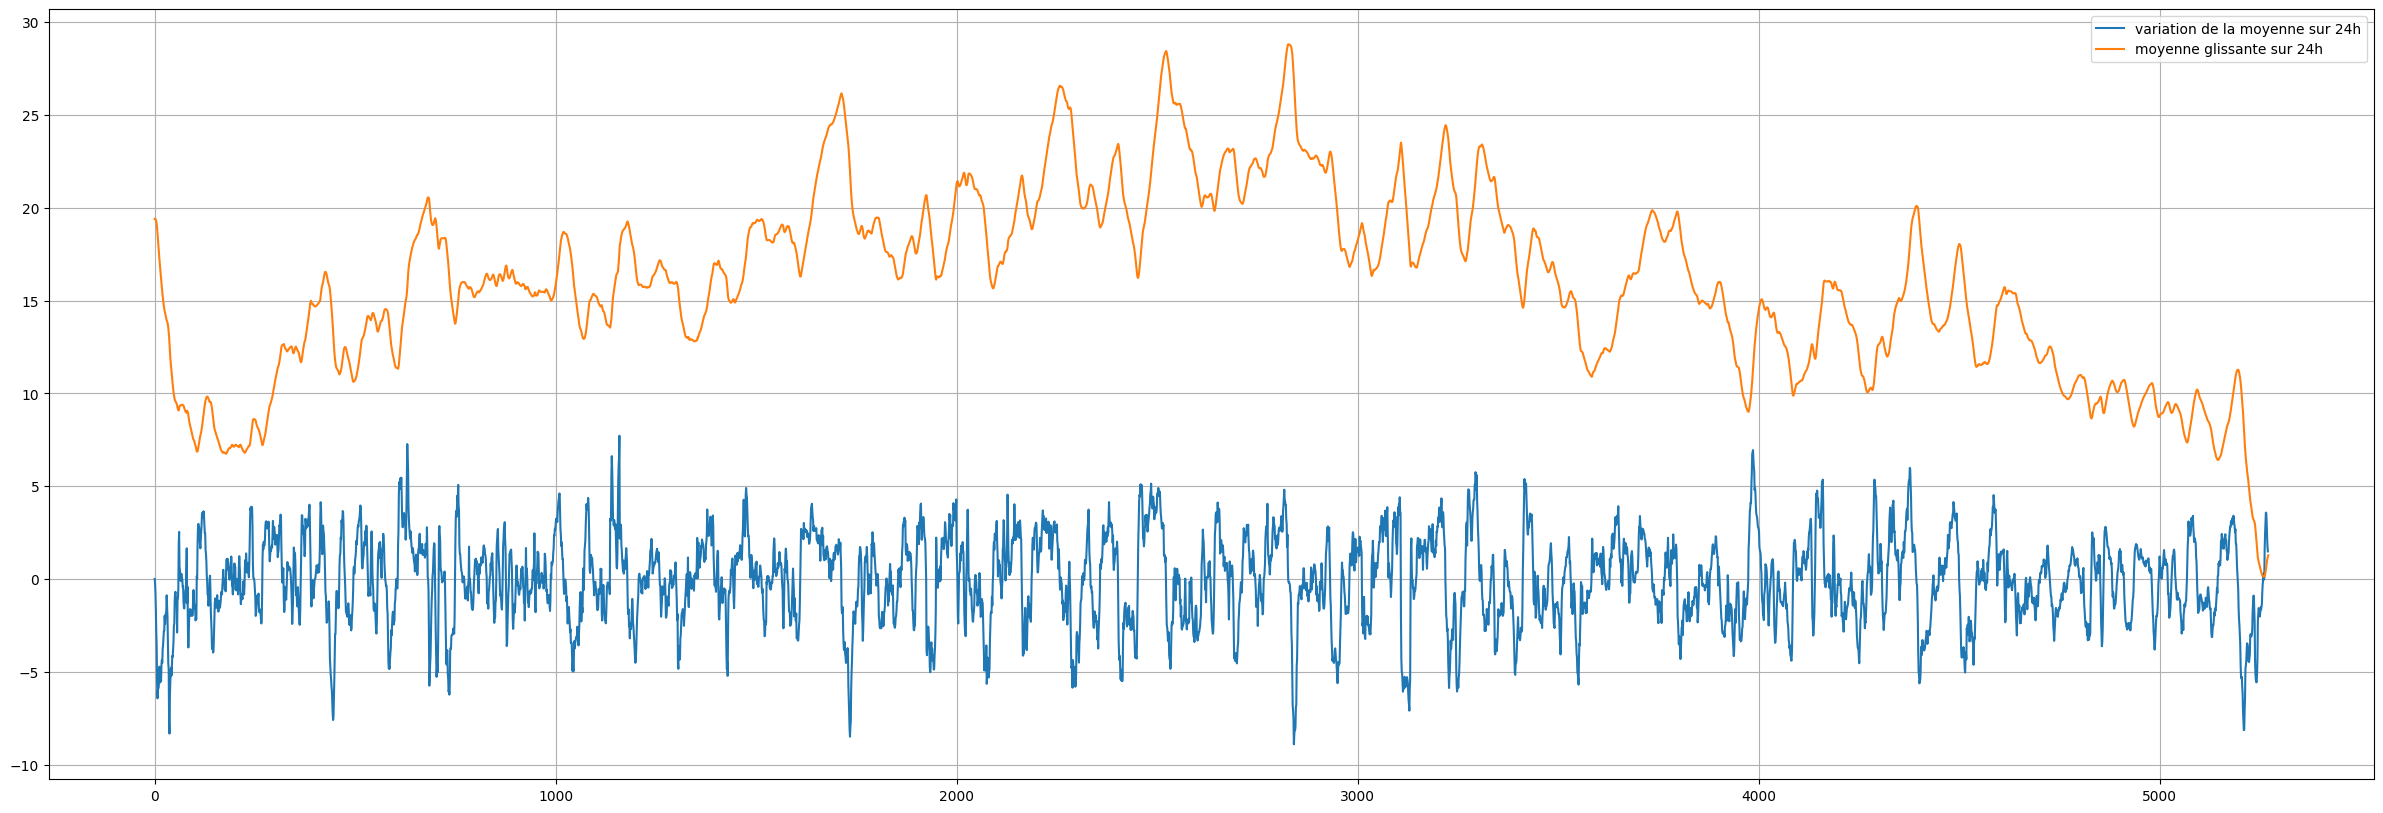

In [458]:
# variation horaire
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
delta = np.diff(mean_all)
facteur = 20   # amplifie la variation delta
plt.plot(facteur*delta,label='variation de la moyenne sur 24h')
plt.plot(mean_all,label='moyenne glissante sur 24h')
plt.legend()
plt.grid()

## Définir une fenêtre de visualisation : days

In [459]:
# fenetre de visualisation
days = 15
#days = int(len(data)/24)  # sur toute la liste de data


# xAxis interval
if days>30:
    interval = 72
elif days>15:
    interval = 24
elif days>7:
    interval = 12
else:
    interval = 6


In [460]:
window, days, interval

(24, 15, 12)

In [461]:
# moyenne avec une fenetre de 24h (window) calculé sur le nombre de jours=days 
mean_days = []
max_days = []
min_days = []
ecart_days = []

slice = int(days*24) # last days
#hours[-slice:],temp[-slice:]
h = data.tail(slice).hours
t = data.tail(slice).temp
#h.iloc[0]
start = datetime.now() - dt.timedelta(days=days)
window_start = start.strftime("%d/%m/%Y, %H:%M:%S")

#window = 24
#h_w = int(window/2)
for l in range(len(t)-window):
    d_24 = t[l:l+window].mean()
    M_24 = t[l:l+window].max()
    m_24 = t[l:l+window].min()
    mean_days.append(d_24)
    max_days.append(M_24)
    min_days.append(m_24)
    ecart_days.append(M_24-m_24)
moyenne = t.mean()
#moyenne  # moyenne sur la fenetre de visualisation
len(h[:-24]),len(max_days), len(min_days),len(ecart_days),window

(336, 336, 336, 336, 24)

In [462]:
h

4936    20034.958333
4937    20035.000000
4938    20035.041667
4939    20035.083333
4940    20035.125000
            ...     
5291    20049.750000
5292    20049.791667
5293    20049.833333
5294    20049.875000
5295    20049.916667
Name: hours, Length: 360, dtype: float64

In [463]:
 datetime.now()

datetime.datetime(2024, 11, 22, 21, 48, 6, 335770)

In [464]:
window_start

'07/11/2024, 21:48:05'

In [465]:
def select(days):
    # moyenne sur la fenetre days
    mean_days = []
    max_days = []
    min_days = []
    ecart_days = []
    # fenetre de visualisation
    #days = int(len(data)/24)  # sur toute la liste de data
    #days = 30
    slice = int(days*24) # last days
    #hours[-slice:],temp[-slice:]
    h = data.tail(slice).hours
    t = data.tail(slice).temp
    #h.iloc[0]
    #start = datetime.now() - dt.timedelta(days=days)
    #window_start = start.strftime("%d/%m/%Y, %H:%M:%S")
    
    #window = 24
    #h_w = int(window/2)
    for l in range(len(t)-window):
        d_24 = t[l:l+window].mean()
        M_24 = t[l:l+window].max()
        m_24 = t[l:l+window].min()
        ecart_days.append(M_24 - m_24)
        mean_days.append(d_24)
        max_days.append(M_24)
        min_days.append(m_24)
    moyenne = t.mean()
    #moyenne  # moyenne sur la fenetre de visualisation
    return mean_days,max_days,min_days,ecart_days,moyenne


mean_d,max_d,min_d,ecart_d,moyenne = select(days)
moyenne

7.623416666666688

In [466]:
mean_d,max_d,min_d,ecart_d,moyenne = select(15)
len(mean_d),moyenne

(336, 7.623416666666688)

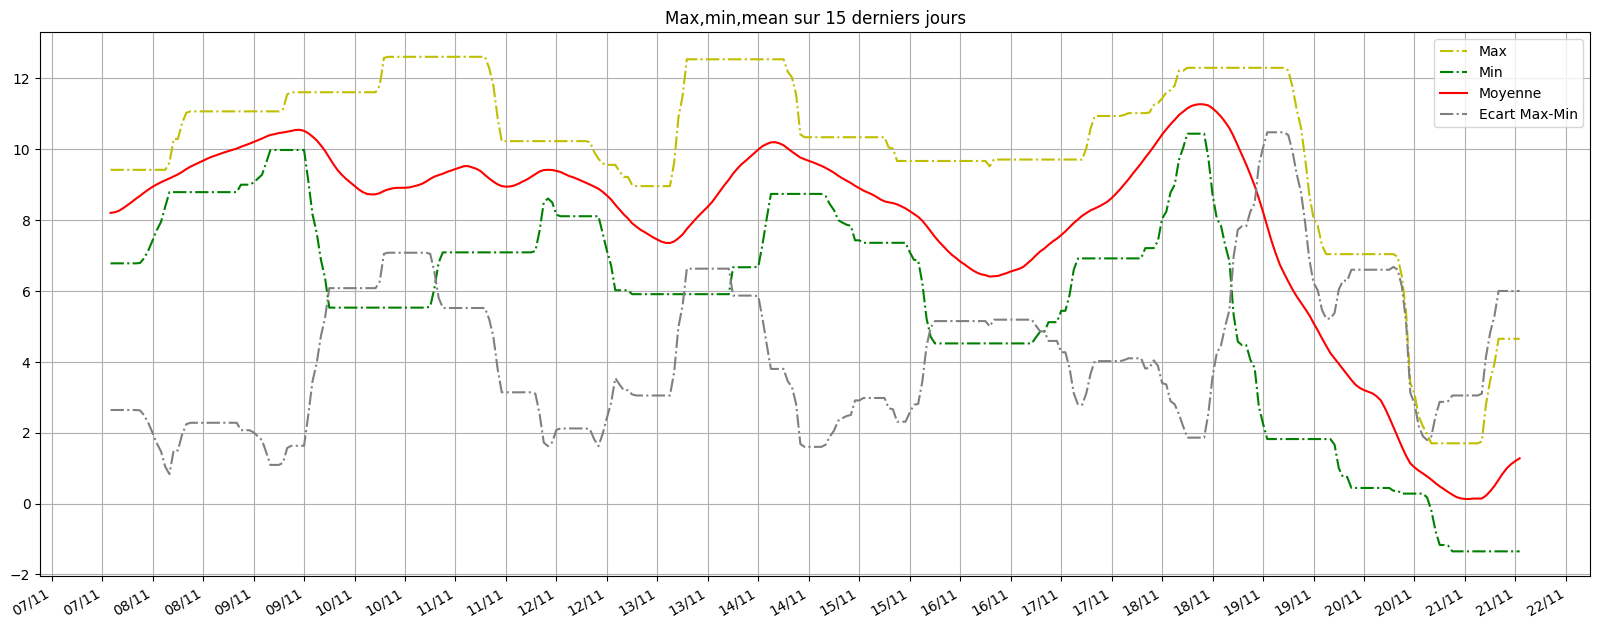

In [467]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
x = h[:-24]
plt.title(f"Max,min,mean sur {days} derniers jours")
plt.plot(x,max_days,"y-.",label="Max")
plt.plot(x,min_days,"g-.",label="Min")
plt.plot(x,mean_days,'r',label="Moyenne")
plt.plot(x,ecart_days,'-.',color='grey',label="Ecart Max-Min")
#plt.plot(t[l:l+window])
format_date(interval)
plt.legend()

In [468]:
#delta = [j-i for i, j in zip(mean_week[:-1], mean_week[1:])]
delta = np.diff(mean_days)
#delta

## Delta/days des moyennes 24h avec un glissement d'une heure

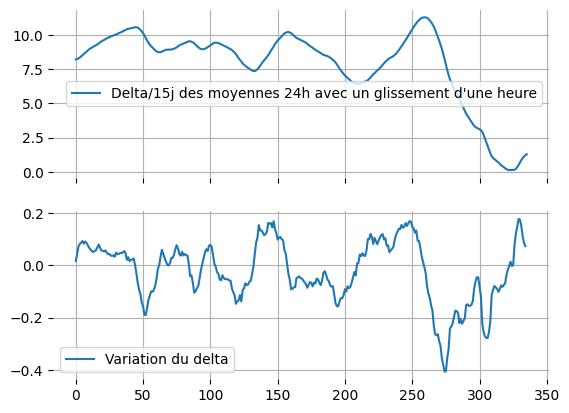

In [469]:
#fig,ax =plt.subplots(nrows=2)
#fig,ax =plt.subplots(nrows=2, sharex=True)
fig,ax =plt.subplots(nrows=2, sharex=True, subplot_kw=dict(frameon=False))
ax[0].plot(mean_days,label='Delta/'+str(days)+'j des moyennes 24h avec un glissement d\'une heure')
ax[1].plot(delta,label=('Variation du delta'))
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()


In [470]:
def local_min_max(liste):
    """
    Trouve les minima et maxima locaux d'une liste.

    Args:
    liste: La liste à analyser.

    Returns:
    Les listes max et min.
    """

    max = []
    min = []

    if liste[0] > liste[1]:
        max.append(liste[0])
    elif liste[0] <= liste[1] :
        min.append(liste[0])

    for i in range(1, len(liste) - 1):
        if liste[i] > liste[i - 1] and liste[i] >= liste[i + 1]:
            max.append(liste[i])
        elif liste[i] <= liste[i - 1] and liste[i] < liste[i + 1]:
            min.append(liste[i])

    return max, min


liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
max, min = local_min_max(liste)

max,min

([15, 18, 14], [10, 7, 5])

In [471]:
# graphical output...
from pylab import sign, diff


In [472]:
# plot graph with local max and min
def plot_data(x,data,lw=3):
    # find the indexes of maximas and the minimas
    #a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    print(b,len(b),c,len(c))
    # plot the curve
    plt.plot(x,data,lw=lw)
    #plot the maximas
    for v in b:
        plt.plot(x[v], data[v], "ob")
    #plot the minimas
    for v in c:
        plt.plot(x[v], data[v], "or")
    plt.grid()


[ 5 15] 2 [ 2 10 18] 3


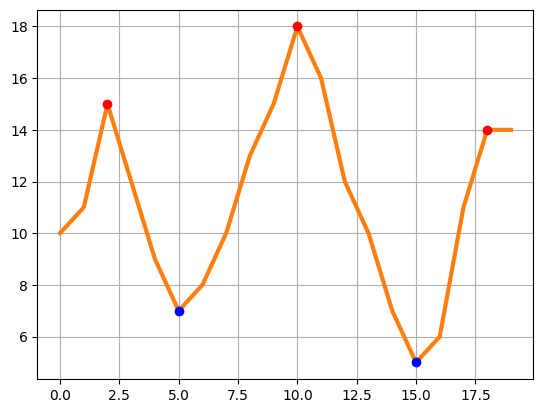

In [473]:
x = range(len(liste))
plt.plot(liste)
plot_data(x,liste)

In [474]:
jours = 7
data['heures']=[k.split(' ')[1].split(':')[0] for k in data.dates]
data['jours']=[k.split(' ')[0] for k in data.dates]

data.tail(24*jours)[['jours','heures','temp','variation']]

,jours,heures,temp,variation
5128,15/11/24,23,8.92,0.16
5129,16/11/24,00,8.68,-0.24
5130,16/11/24,01,8.45,-0.23
5131,16/11/24,02,8.28,-0.17
5132,16/11/24,03,8.00,-0.28
...,...,...,...,...
5291,22/11/24,18,3.91,-0.60
5292,22/11/24,19,3.00,-0.91
5293,22/11/24,20,2.78,-0.22
5294,22/11/24,21,2.62,-0.16


In [475]:
_min = round(data.tail(24*jours).temp.min(),2)
_max = round(data.tail(24*jours).temp.max(),2)

In [476]:
_max - _min

13.65

## Main graph

(7.623416666666688, 15)

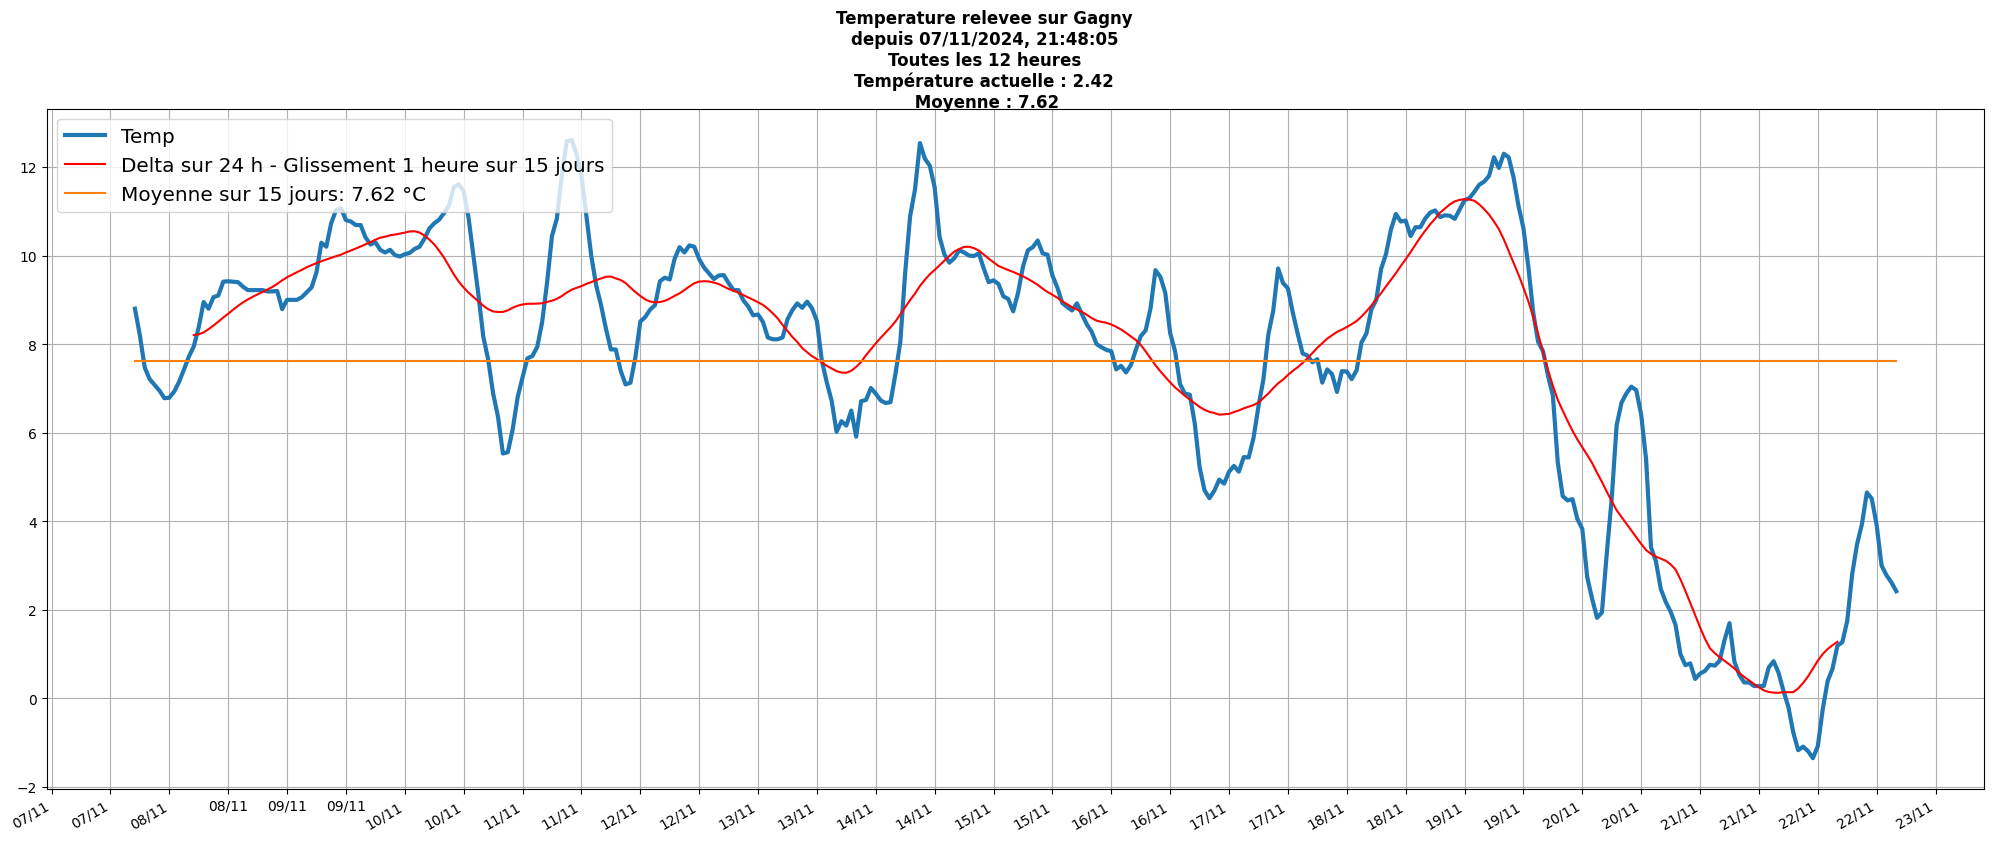

In [477]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
ax.set_xticklabels(hours,fontsize=10)
fig.suptitle(f"Temperature relevee sur Gagny\n\
depuis {window_start}\n\
Toutes les {interval} heures\nTempérature actuelle : {round(t.tail(1).values[0],2)}\n Moyenne : {round(moyenne,2)}", fontsize = 12, fontweight ='bold') 
#ax.xaxis.set_major_locator(mdates.DayLocator()) 
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(range(0, 24, interval))) #interval=6))
# plt.gcf().autofmt_xdate()
format_date(interval)
plt.plot(h,t,label='Temp',lw=3)
plt.plot(h[h_w:len(t)-h_w],mean_days,'r-',label=f'Delta sur {window} h - Glissement 1 heure sur {days} jours')
h1 = h.head(1)
h2 = h.tail(1)
moy = round(moyenne,2)
plt.plot((h1,h2),(moyenne, moyenne),label=f'Moyenne sur {days} jours: {moy} °C')
#plt.grid()
plt.legend(loc=2,fontsize='x-large')
#plt.title('Current temp : '+str(current.temp)+' °C')

moyenne,days

In [478]:
data.tail(5)[['heures','temp','variation']]

,heures,temp,variation
5291,18,3.91,-0.60
5292,19,3.00,-0.91
5293,20,2.78,-0.22
5294,21,2.62,-0.16
5295,22,2.42,-0.20


In [479]:
def area(df,dx=1):
    return (sum(df[:len(df)-1])+sum(df[1:len(df)]))*dx/2
df=[0,1]
area(df,1)

0.5

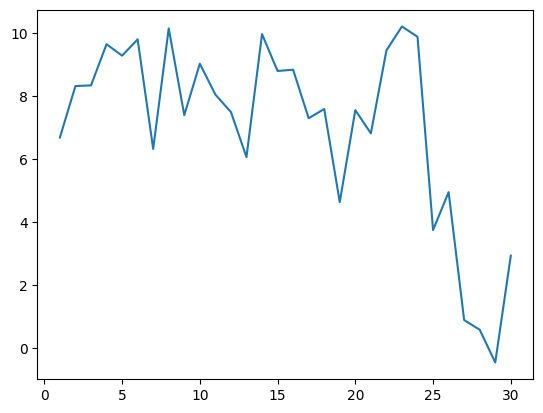

In [480]:
s = list(t)
# area under temperature
a=[]
for k in range(0,len(s),h_w):
    a.append(area(s[k:k+h_w])/h_w)
x = np.array(range(1,len(a)+1))
plt.plot(x,a)

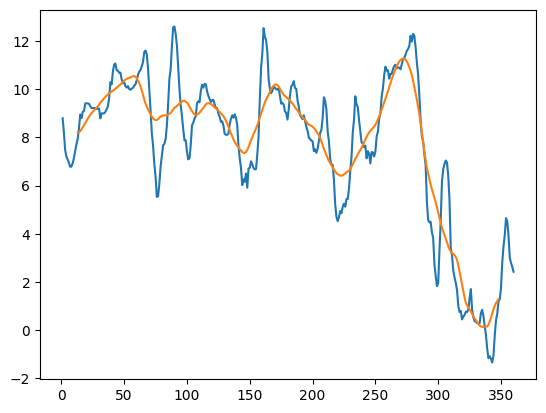

In [481]:
x = np.array(range(1,len(t)+1))
area(t)

plt.plot(x,t)
plt.plot(x[h_w:len(x)-h_w],mean_days)

(1.9500000000000002, [<matplotlib.lines.Line2D at 0x2288e6cc0b0>])

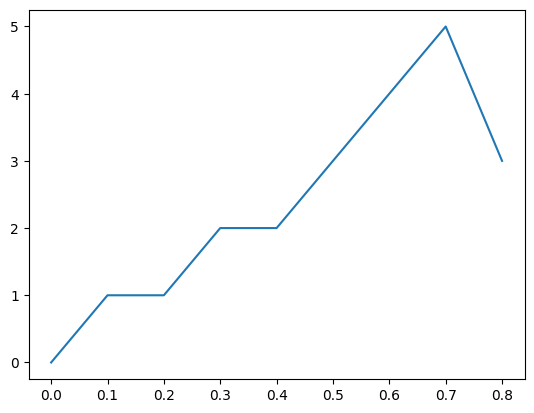

In [482]:
df = [0,1,1,2,2,3,4,5,3]
dx = .1
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)


(-0.35000000000000003, [<matplotlib.lines.Line2D at 0x22893d59b50>])

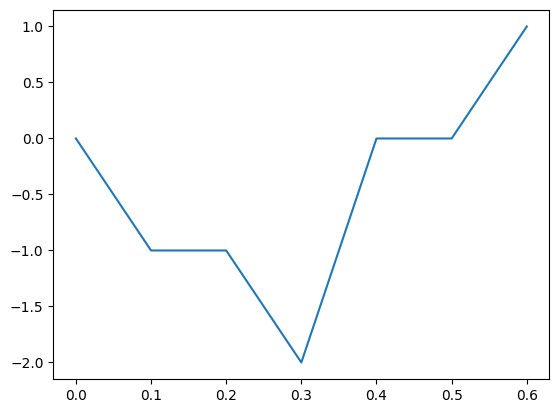

In [483]:
# valeurs négatives
dx = 0.1
df = [0,-1,-1,-2,0,0,1]
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)

In [484]:
n = data.tail(1)['dates'].values[0]
n

'22/11/24 22:00:00'

# Température depuis 7 jours par heure

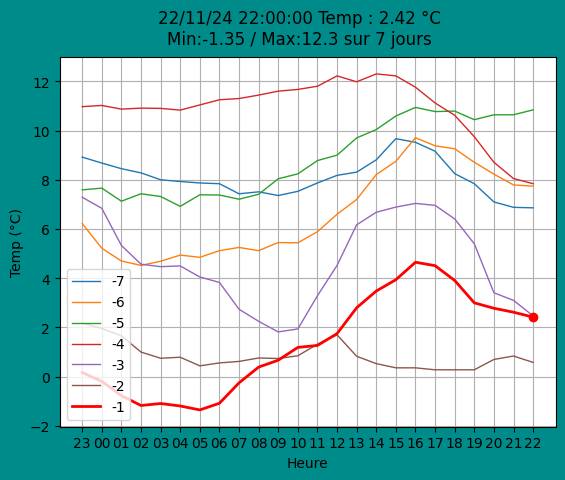

In [485]:
# courbes de température superposées des derniers 7 jours
fig, ax = plt.subplots(facecolor='darkcyan')
lw = 1
for t in range(jours,0,-1):
    #if t==1: lw=4
    if t==1:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw+1,label=-t,c='red')
        
    else:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw,label=-t)
plt.plot(data.tail(1).heures,data.tail(1).temp,'ro')
fig.suptitle(f"{n} Temp : {round(data.tail(1).temp.values[0],2)} °C\nMin:{_min} / Max:{_max} sur {jours} jours")
plt.xlabel(f"Heure")
plt.ylabel("Temp (°C)")
plt.grid()
plt.legend()

In [486]:
max_, min_ = np.max(list(data.tail(24*t).temp.head(24))), np.min(list(data.tail(24*t).temp.head(24)))

In [487]:
max_,min_

(4.650000000000034, -1.349999999999966)

In [488]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5296 entries, 0 to 5295
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       5296 non-null   float64
 1   hours      5296 non-null   float64
 2   dates      5296 non-null   object 
 3   variation  5295 non-null   float64
 4   heures     5296 non-null   object 
 5   jours      5296 non-null   object 
dtypes: float64(3), object(3)
memory usage: 248.4+ KB


In [489]:
data

,temp,hours,dates,variation,heures,jours
0,13.19,19829.291667,16/04/24 07:00:00,NaN,07,16/04/24
1,12.20,19829.333333,16/04/24 08:00:00,-0.99,08,16/04/24
2,12.29,19829.375000,16/04/24 09:00:00,0.09,09,16/04/24
3,12.42,19829.416667,16/04/24 10:00:00,0.13,10,16/04/24
4,14.54,19829.458333,16/04/24 11:00:00,2.12,11,16/04/24
...,...,...,...,...,...,...
5291,3.91,20049.750000,22/11/24 18:00:00,-0.60,18,22/11/24
5292,3.00,20049.791667,22/11/24 19:00:00,-0.91,19,22/11/24
5293,2.78,20049.833333,22/11/24 20:00:00,-0.22,20,22/11/24
5294,2.62,20049.875000,22/11/24 21:00:00,-0.16,21,22/11/24


In [490]:
# save to csv    
csv_file = r"data_temp16122022.csv"
to_csv(csv_file, data)

In [491]:
# how to stop here

class StopExecution(Exception):
    def _render_traceback_(self):
        return []
#raise StopExecution

#raise
#assert(False)
#raise KeyboardInterrupt
#ext  # create an error

import this
#dir(list)
#dir(str)

# how to label on top of a bar plot

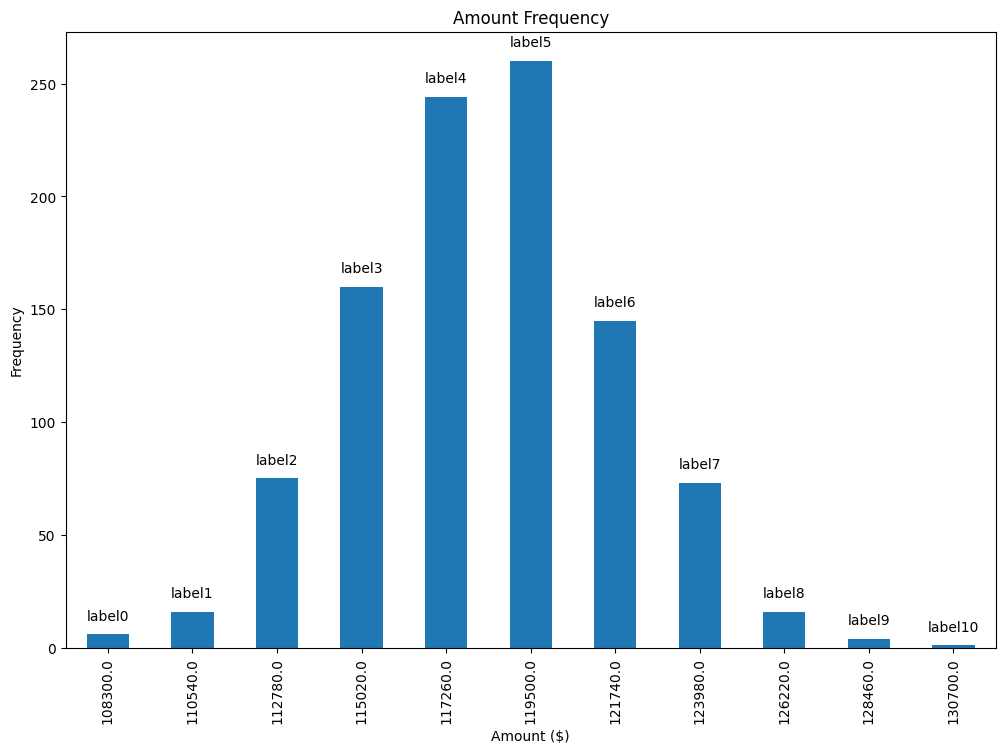

In [492]:
# Bring some raw data.
frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]
# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = [
    108300.0,
    110540.0,
    112780.0,
    115020.0,
    117260.0,
    119500.0,
    121740.0,
    123980.0,
    126220.0,
    128460.0,
    130700.0,
]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind="bar")
ax.set_title("Amount Frequency")
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [493]:
areas = []
moys = []
x = []
for t in range(jours,0,-1):
    x.append(-t)
    a = area(data.tail(24*t+1).temp.head(25))    # calcul sur 24h
    areas.append(round(a/24,2))
    moys.append(round(data.tail(24*t+1).temp.head(25).mean(),2))
    #print(-t,a)
#print(areas,x)
len(data.tail(24*t+1)),moys

(25, [8.12, 6.63, 8.83, 10.92, 4.79, 0.91, 1.32])

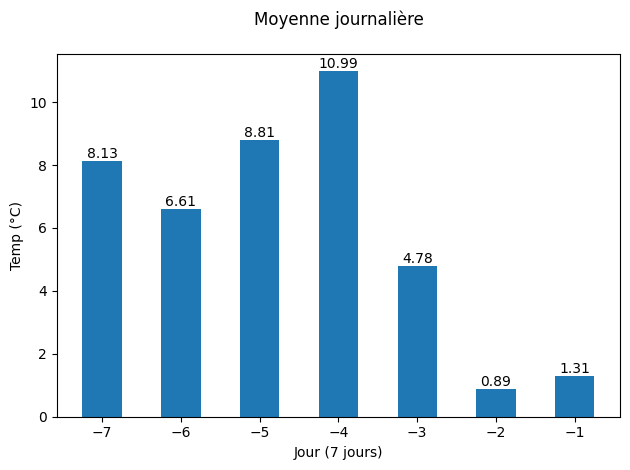

In [494]:
X_axis = np.arange(len(x))-7
fig, ax = plt.subplots()
plt.title("Moyenne journalière\n")
plt.xlabel("Jour (7 jours)")
plt.ylabel("Temp (°C)")
#plt.plot(x,areas,"r")
plt.bar(X_axis,areas,width=0.5)
fig.tight_layout()
# plt.bar(X_axis-0.3,areas,width=0.1)
# plt.bar(X_axis+0.3,moys,width=0.1)
rects = ax.patches

# Make some labels.
labels = [rects[i].get_height() for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )



In [495]:
labels

[8.13, 6.61, 8.81, 10.99, 4.78, 0.89, 1.31]

In [496]:
df = list(data.tail(24).temp.head(24))
df,area(df)

([0.1700000000000159,
  -0.1899999999999977,
  -0.7699999999999818,
  -1.169999999999959,
  -1.089999999999975,
  -1.1899999999999975,
  -1.349999999999966,
  -1.079999999999984,
  -0.25,
  0.3900000000000432,
  0.6700000000000159,
  1.1899999999999975,
  1.2700000000000389,
  1.75,
  2.800000000000012,
  3.480000000000018,
  3.9399999999999977,
  4.650000000000034,
  4.510000000000048,
  3.910000000000025,
  3.0,
  2.7800000000000296,
  2.6200000000000045,
  2.420000000000016],
 31.16500000000042)

In [497]:
moy = []
for i in range(len(df)-1):
    moy.append((df[i]+df[i+1])/2)
sum(moy)

31.16500000000042

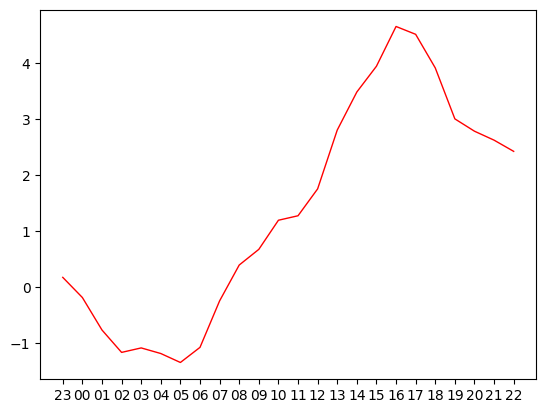

In [498]:
plt.plot(data.tail(24).heures.head(24),data.tail(24).temp.head(24),lw=lw,label=-t,c='red')

In [499]:
data.tail()


,temp,hours,dates,variation,heures,jours
5291,3.91,20049.750000,22/11/24 18:00:00,-0.60,18,22/11/24
5292,3.00,20049.791667,22/11/24 19:00:00,-0.91,19,22/11/24
5293,2.78,20049.833333,22/11/24 20:00:00,-0.22,20,22/11/24
5294,2.62,20049.875000,22/11/24 21:00:00,-0.16,21,22/11/24
5295,2.42,20049.916667,22/11/24 22:00:00,-0.20,22,22/11/24


In [500]:
chop = data.tail(24).temp
_max, _min = local_min_max(list(chop))
_max,_min,len(_max),len(_min)

([0.1700000000000159, -1.089999999999975, 4.650000000000034],
 [-1.169999999999959, -1.349999999999966],
 3,
 2)

In [501]:
_diff=[M-m for M,m in zip(_max, _min)]

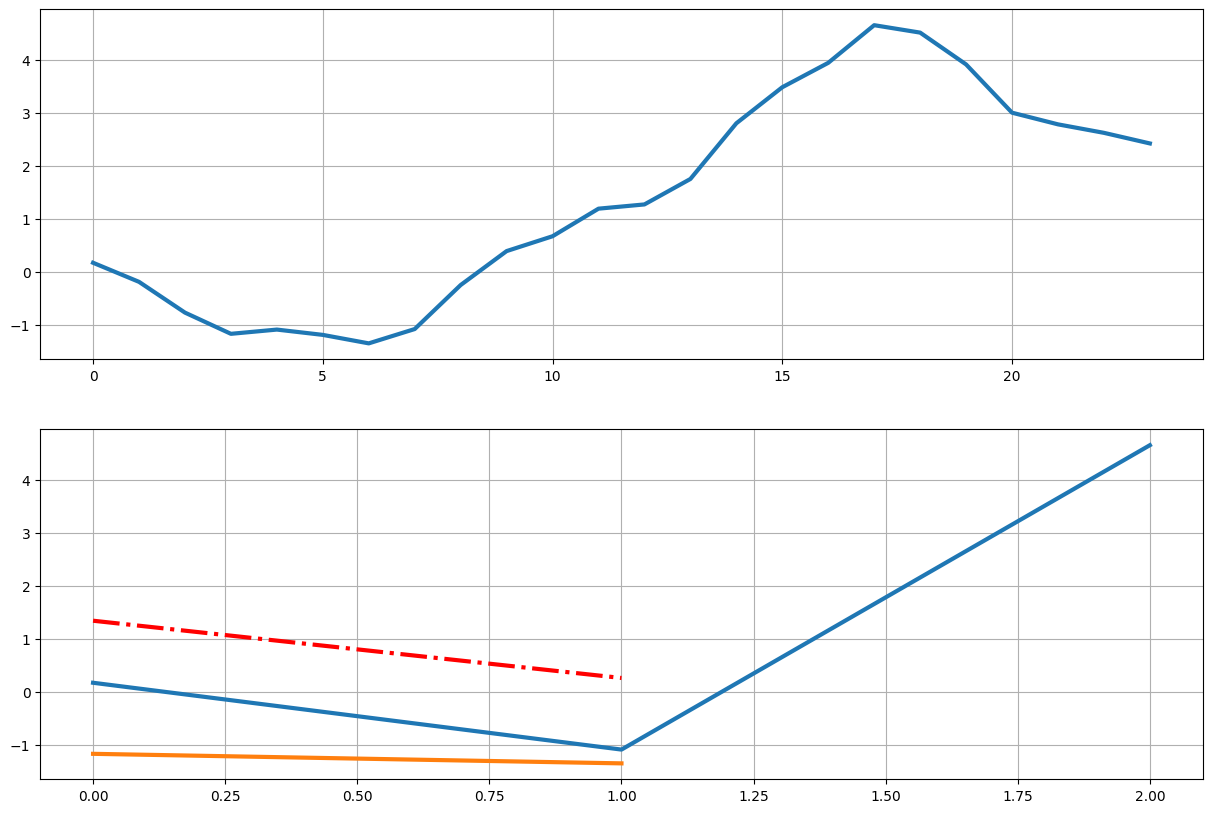

In [502]:
fig, (ax1,ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(15, 10)
ax1.plot(list(data.tail(24).temp),lw=3)
ax1.grid()
ax2.plot(_max,lw=3)
ax2.plot(_min,lw=3)
ax2.plot(_diff,'r-.',lw=3)
ax2.grid()

[1] 1 [] 0
[] 0 [] 0


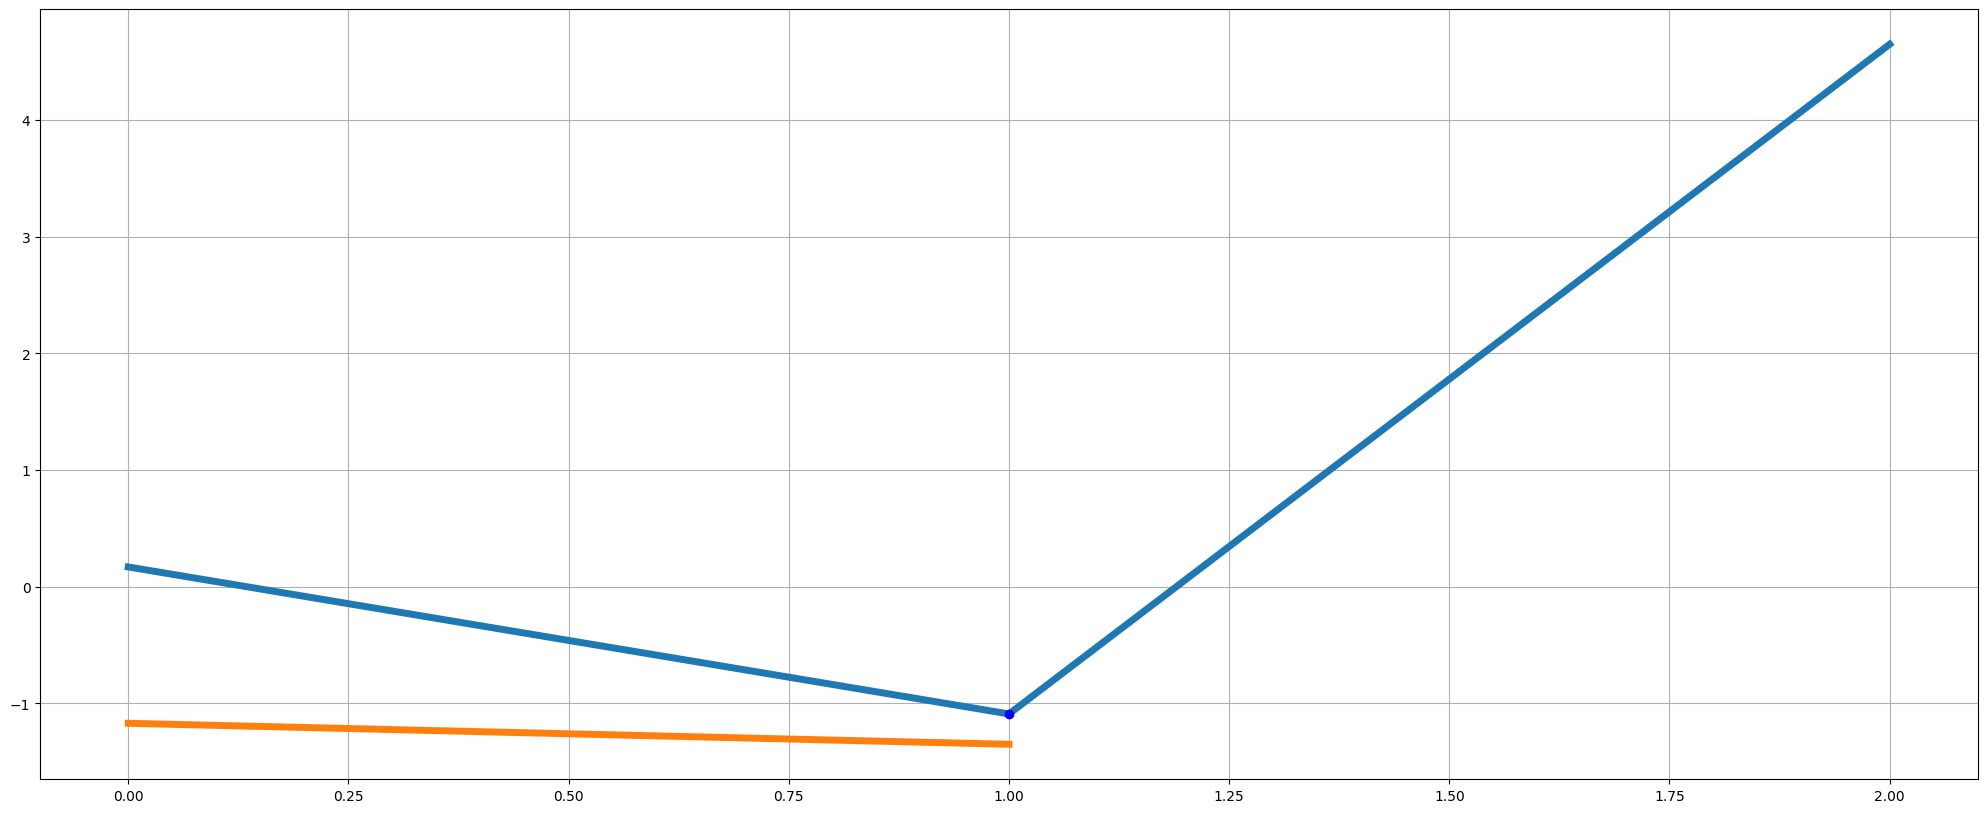

In [503]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x =  range(len(_max))
plot_data(x,_max,lw=5)
x =  range(len(_min))
plot_data(x,_min,lw=5)
plt.grid()

In [504]:
liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
diff(liste)


array([ 1,  4, -3, -3, -2,  1,  2,  3,  2,  3, -2, -4, -2, -3, -2,  1,  5,
        3,  0])

In [505]:
sign(diff(liste))


array([ 1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  0])

In [506]:
diff(sign(diff(liste)))


array([ 0, -2,  0,  0,  2,  0,  0,  0,  0, -2,  0,  0,  0,  0,  2,  0,  0,
       -1])

In [507]:
diff(sign(diff(liste)))>0


array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [508]:
(diff(sign(diff(liste)))).nonzero()

(array([ 1,  4,  9, 14, 17], dtype=int64),)

[ 5 15] 2 [ 2 10 18] 3


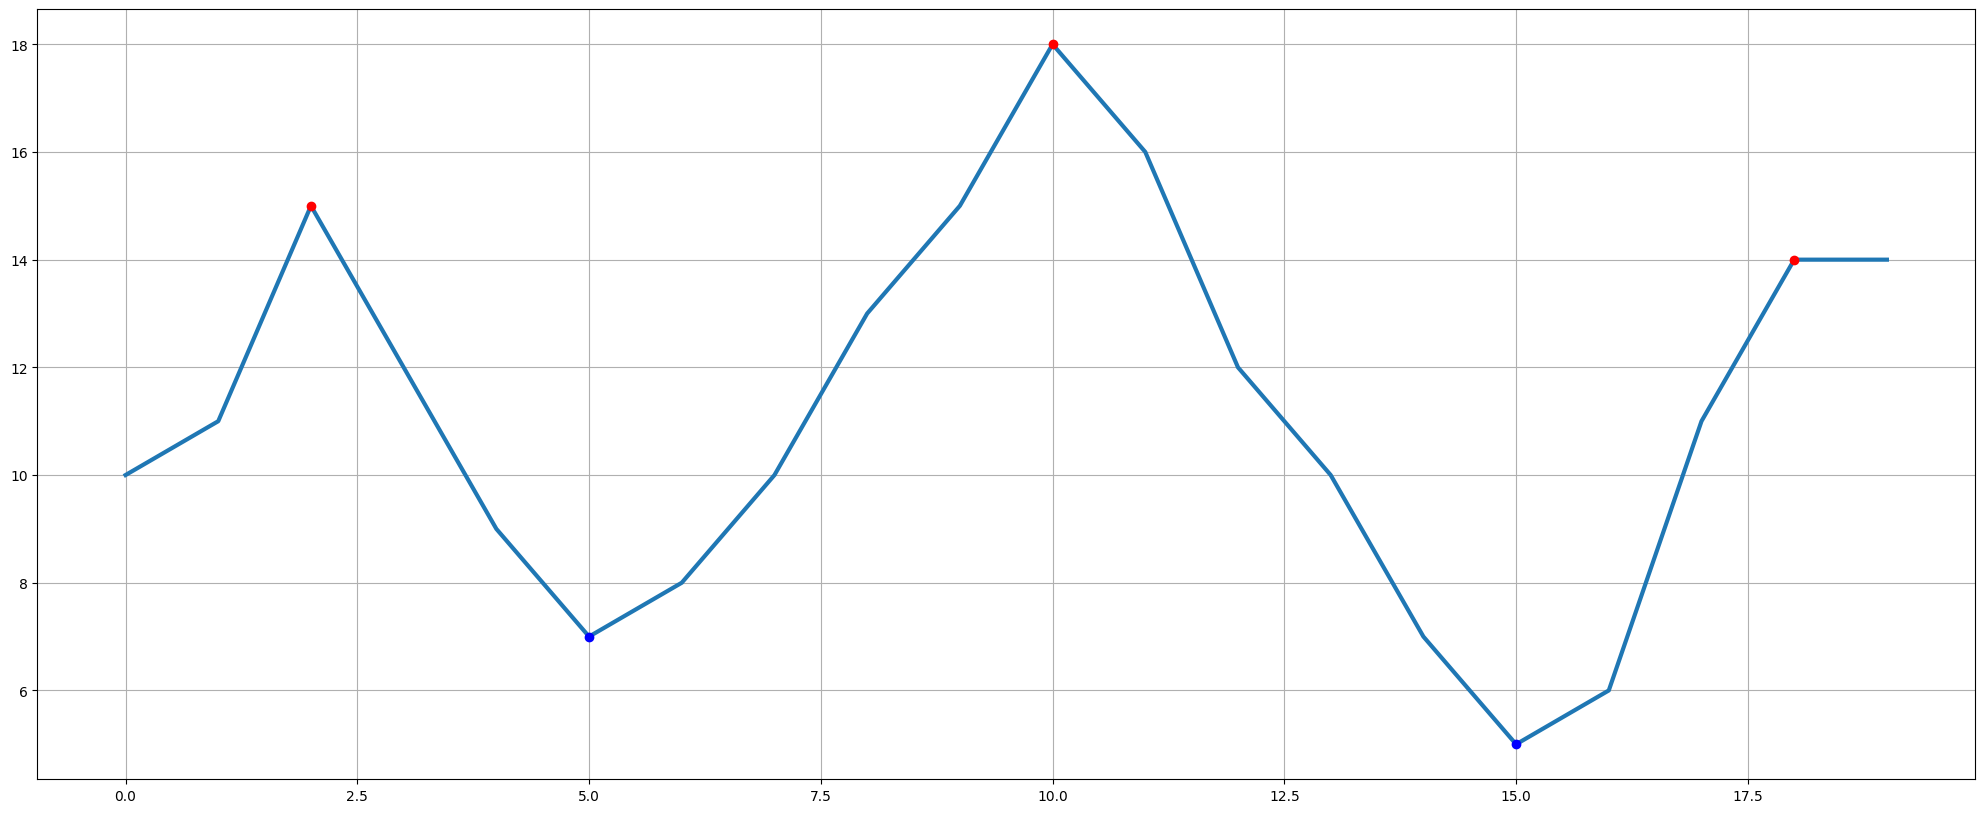

In [509]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x = range(len(liste))
_data = liste
plot_data(x, _data)


In [510]:
date_time_str,days,interval

('16/04/24 07:00:00', 15, 12)

## last records

In [511]:
# 7 jours temp, mean
df = pd.DataFrame(data.tail(7*24)['temp'])
df['mean']= mean_days[-7*24:]
df

,temp,mean
5128,8.92,9.582083
5129,8.68,9.532083
5130,8.45,9.474167
5131,8.28,9.409583
5132,8.00,9.338333
...,...,...
5291,3.91,0.850417
5292,3.00,1.001667
5293,2.78,1.115000
5294,2.62,1.201667


<Axes: >

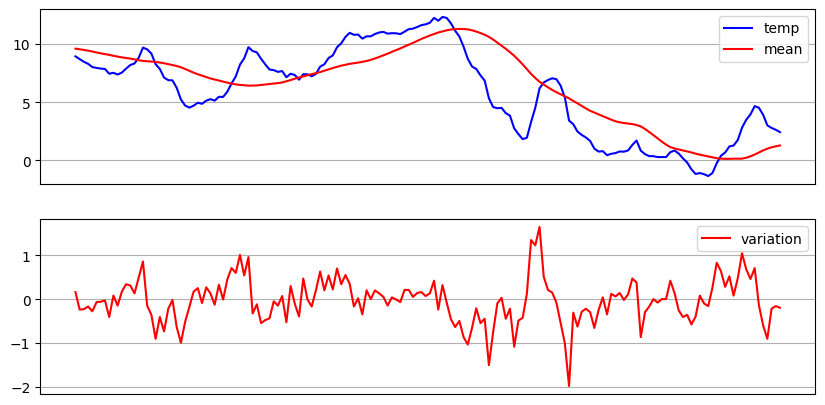

In [512]:
fig, axes = plt.subplots(nrows=2, ncols=1)

# plot temp, mean
df.plot(ax=axes[0],figsize=(10,5),color=['blue','red'],grid=True, legend=True,rot=45,xticks=[])
# 7 jours variation
data.tail(7*24)['variation'].plot(ax=axes[1],figsize=(10,5),color='red',grid=True, legend=True,rot=45,xticks=[])

In [513]:
data.tail(24*7)['temp'].max(),data.tail(24*7)['temp'].min()

(12.300000000000011, -1.349999999999966)

In [514]:
def high_low(n):
    # variation 24 heures il y a n jours
    #n = 0
    l = len(data)
    e = n*24
    s = e+24

    high = round(data[l-s:l-e]['temp'].max(),2)
    low = round(data[l-s:l-e]['temp'].min(),2)
    delta = round(high - low,2)
    return high,low,delta

In [515]:
# max, min, delta sur n jours
n = 30
high_n = []
low_n = []
moy_n =  []
delta_n = []
for k in range(n):
    h,l,d = high_low(n-1-k)
    high_n.append(h)
    low_n.append(l)
    moy_n.append((h+l)/2)
    delta_n.append(d)
    print('J',-(n-1-k),h,l,d)


J -29 18.22 6.95 11.27
J -28 19.75 12.14 7.61
J -27 19.31 14.05 5.26
J -26 16.46 13.56 2.9
J -25 16.21 11.05 5.16
J -24 13.56 10.5 3.06
J -23 14.77 10.49 4.28
J -22 12.72 9.9 2.82
J -21 10.56 8.73 1.83
J -20 12.12 9.71 2.41
J -19 12.81 8.13 4.68
J -18 15.09 5.99 9.1
J -17 11.96 7.54 4.42
J -16 11.56 9.0 2.56
J -15 12.13 9.65 2.48
J -14 9.42 6.78 2.64
J -13 11.07 8.79 2.28
J -12 11.61 8.17 3.44
J -11 12.61 5.53 7.08
J -10 10.23 7.09 3.14
J -9 9.56 6.02 3.54
J -8 12.54 5.91 6.63
J -7 10.34 8.74 1.6
J -6 9.67 6.86 2.81
J -5 9.71 4.52 5.19
J -4 10.94 6.92 4.02
J -3 12.3 7.84 4.46
J -2 7.29 1.82 5.47
J -1 2.18 0.28 1.9
J 0 4.65 -1.35 6.0


<Axes: >

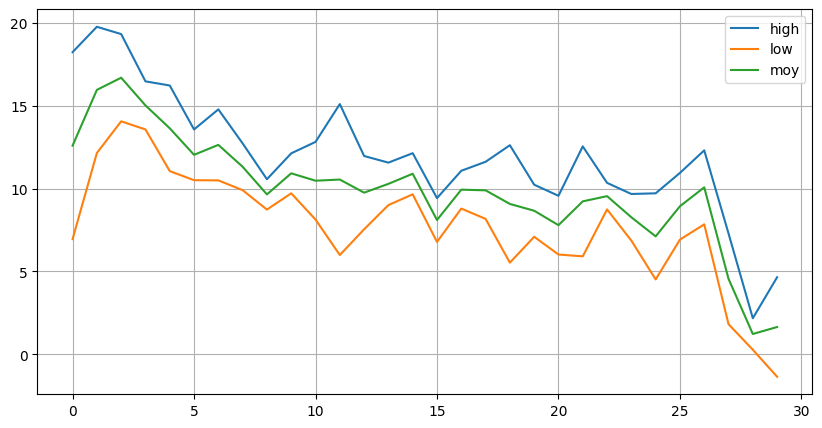

In [516]:
# pandas plot
df1 = pd.DataFrame()
df1['high'] = high_n
df1['low'] = low_n
df1['moy'] = moy_n
df1['delta'] = delta_n
df1[['high','low','moy']].plot(figsize=(10,5),grid=True, legend=True)

In [517]:
_data = list(df1['high'])
_max, _min = local_min_max(_data)
_max


[19.75, 14.77, 15.09, 12.13, 12.61, 12.54, 12.3]

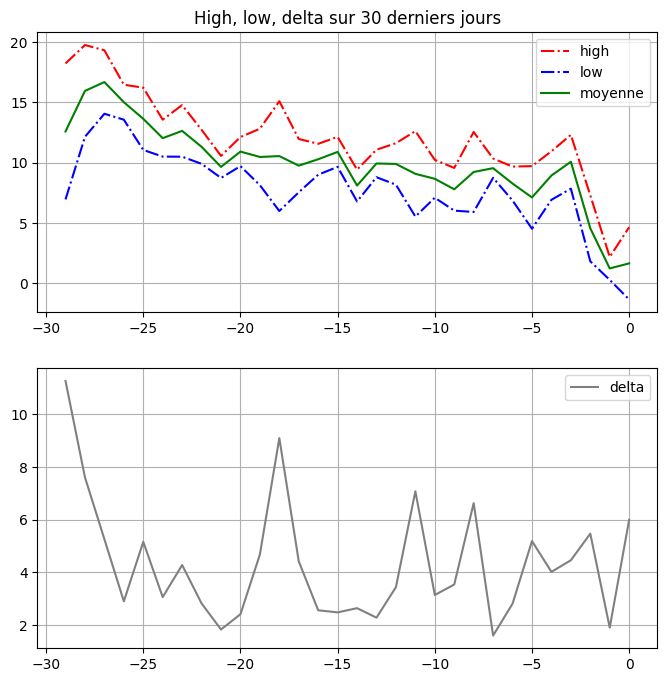

In [518]:
# plot lists
x = range(-29,1,1)
fig, (ax1, ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(8, 8)
ax1.set_title('High, low, delta sur '+str(n)+' derniers jours')
ax1.plot(x,high_n, '-.',color='red',label='high')
ax1.plot(x,low_n, '-.', color='blue',label = 'low')
ax1.plot(x,moy_n, color='green',label = 'moyenne')
ax1.grid()
ax1.legend()
#moy_n = [(h+l)/2 for h,l in zip(high_n,low_n)]

ax2.plot(x,delta_n,color='grey',label='delta')
ax2.grid()
ax2.legend()

In [519]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5296 entries, 0 to 5295
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       5296 non-null   float64
 1   hours      5296 non-null   float64
 2   dates      5296 non-null   object 
 3   variation  5295 non-null   float64
 4   heures     5296 non-null   object 
 5   jours      5296 non-null   object 
dtypes: float64(3), object(3)
memory usage: 248.4+ KB


In [520]:
data_24 = data.tail(25)[['hours','dates','variation']]
#len(data_24),data_24


In [521]:
# plot X_axis
date_24 = np.array(data.tail(25)['hours'])
#date_24

In [522]:
# inutile ! il faut utiliser le champ data.hours
def mk_date2(data):
    str1, str2 = data_24.head(1)['dates'].values[0] , data_24.tail(1)['dates'].values[0] 
    print(str1,str2)
    return mdates.drange(datetime.strptime(str1, '%d/%m/%y %H:%M:%S'),datetime.strptime(str2, '%d/%m/%y %H:%M:%S'),dt.timedelta(hours=1))
#date_24 = mk_date2(data_24)

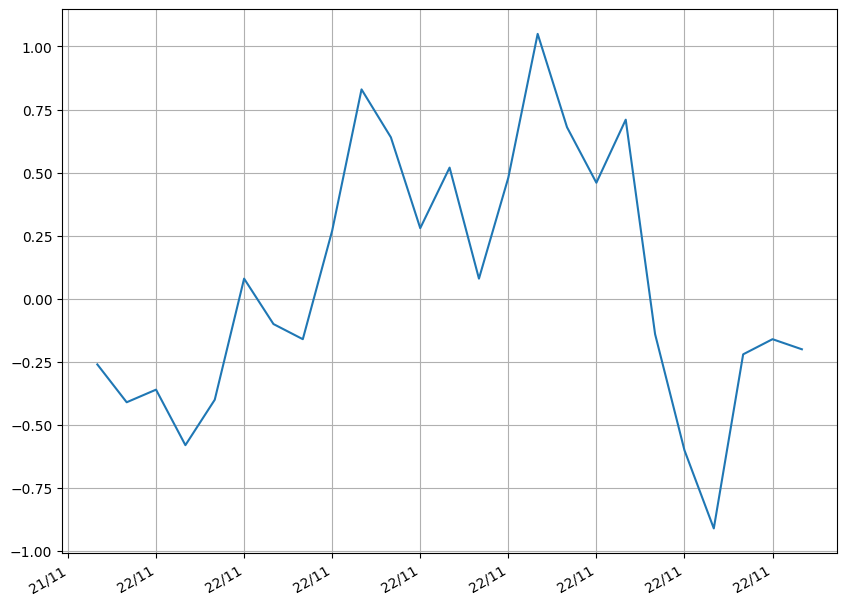

In [523]:
l = len(date_24)
data.tail(l)[['temp','variation']]
var = data.tail(l)[['variation']].values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.plot(date_24,var)
format_date()
#plt.grid()

In [524]:
w = int(24*days)
days,data.tail(w)['temp'].max(), data.tail(w)['temp'].min()


(15, 12.610000000000014, -1.349999999999966)

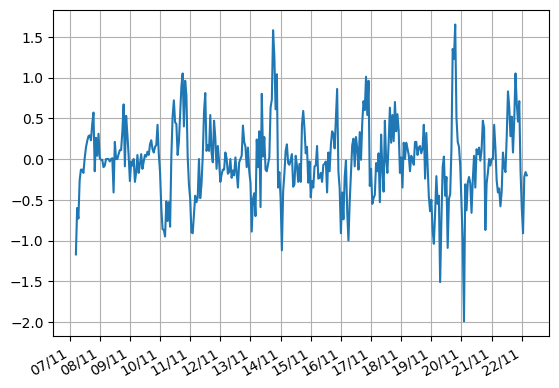

In [525]:
#data['variation'].tail(w).plot()
plt.plot(data['hours'].tail(w),data['variation'].tail(w))
format_date(24)

### date pour les temp max, min

In [526]:
d_max = data.tail(w)['temp'].max()
d_max, data[data['temp']==data.tail(w)['temp'].max()]['dates']

(12.610000000000014,
 4371    15/10/24 10:00:00
 4534    22/10/24 05:00:00
 4605    25/10/24 04:00:00
 4717    29/10/24 20:00:00
 5025    11/11/24 16:00:00
 Name: dates, dtype: object)

In [527]:
d_min = data.tail(w)['temp'].min()
d_min, data[data['temp']==data.tail(w)['temp'].min()]['dates']

(-1.349999999999966,
 5278    22/11/24 05:00:00
 Name: dates, dtype: object)

In [528]:
data.tail(w)['temp'].describe()

count    360.000000
mean       7.623417
std        3.248486
min       -1.350000
25%        6.677500
50%        8.540000
75%        9.990000
max       12.610000
Name: temp, dtype: float64

In [529]:
from  datetime import datetime
#matplotlib.dates.date2num(hours)
#then.isoformat(),round(temp[-1],2)
today = datetime.now()
today.strftime('%d/%m/%y %H:%M:%S'),round(temp[-1],2)


('22/11/24 21:48:21', 2.42)

In [530]:
# current date and time
ts = datetime.timestamp(today)
ts

1732308501.268955